In [ ]:
# DAY - 13 - 16 

#day - 13 missing values .Understand where data is missing, why, and how to handle it logically.


In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\USER\Downloads\Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum() # to find the missing values in each column.
df.isnull().mean() * 100 # to find the percentage of missing values in each column.


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
df["Age"].fillna(df["Age"].median(), inplace=True) # filling missing values in "Age" column with median value.



In [ ]:
print(df.columns.tolist()) # to display all column names in the dataset.


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [ ]:
# Day -14 Encoding Categorical Data : Learn different techniques to convert categorical data into numerical data so that machine learning algorithms can understand it.
"""FIRST: WHY ENCODING IS NEEDED (CLEAR EXPLANATION)

Machine Learning models:
❌ Cannot understand text
✔ Only understand numbers

Example:

Sex = "male", "female"
Embarked = "S", "C", "Q"


To ML:

These are just random strings → meaningless

So we encode them into numbers."""

In [7]:
import pandas as pd
df = pd.read_csv(r"C:\Users\USER\Downloads\Titanic-Dataset.csv")



In [8]:
#IDENTIFY CATEGORICAL COLUMNS
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#Now identify object (text) columns:
df.select_dtypes(include="object").columns


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [10]:
#LABEL ENCODING
df["Sex"].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
# Day - 15 SCALING : Understand the importance of feature scaling and implement various scaling techniques like Standardization and Normalization.
#Scaling means:Bringing all numerical features to a similar range
"""WHY SCALING IS NECESSARY 

ML models do math, especially distance calculations.

If we don’t scale:

Fare (large numbers) dominates

Age (small numbers) becomes less important

Model becomes biased """

In [ ]:
"""TYPES OF SCALING
1. Standardization (Z-score Scaling)
2. Normalization (Min-Max Scaling)
3. Robust Scaling
4. Max Abs Scaling
# Standardization (Z-score Scaling)
# Brings data to mean = 0 and standard deviation = 1
# Formula: z = (x - mean) / std_dev
# Useful when data follows a Gaussian distribution
# Normalization (Min-Max Scaling)
# Scales data to a fixed range, usually 0 to 1
# Formula: x' = (x - min) / (max - min)
# Useful when data does not follow a Gaussian distribution
# Robust Scaling
# Uses median and interquartile range for scaling
# Less sensitive to outliers
# Max Abs Scaling
# Scales data by its maximum absolute value
# Useful for data that is already centered around zero
# """

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\USER\Downloads\Titanic-Dataset.csv")


In [4]:
df[["Age", "Fare"]].describe() # before scaling


,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [7]:
from sklearn.preprocessing import StandardScaler  #importing StandardScaler class from sklearn library

scaler = StandardScaler() # creating an object of StandardScaler class

df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]]) # fitting and transforming "Age" and "Fare" columns using StandardScaler
df[["Age", "Fare"]].describe() # after scaling


,Age,Fare
count,714.000000,8.910000e+02
mean,0.000000,3.987333e-18
std,1.000701,1.000562e+00
min,-2.016979,-6.484217e-01
25%,-0.659542,-4.891482e-01
50%,-0.117049,-3.573909e-01
75%,0.571831,-2.424635e-02
max,3.465126,9.667167e+00


In [ ]:
#Day - 16 outliers : Learn to identify outliers using statistical methods and visualize them using plots. Implement techniques to handle outliers effectively.
#Outliers are extreme values that differ significantly from other observations. They can skew analysis and affect model performance.
#Identify outliers using IQR method

In [9]:
import pandas as pd
df = pd.read_csv(r"C:\Users\USER\Downloads\Titanic-Dataset.csv")


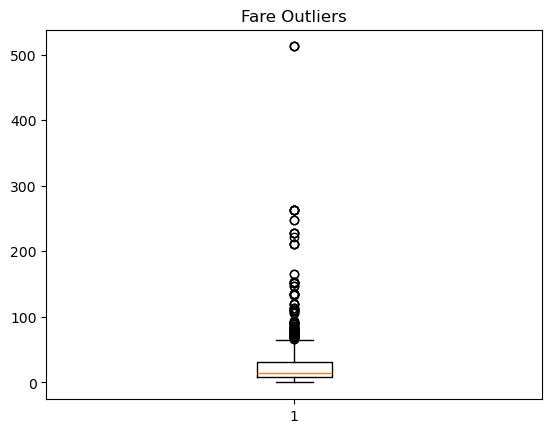

In [10]:
import matplotlib.pyplot as plt   # Most Commonly used plotting library in Python

plt.boxplot(df["Fare"].dropna())
plt.title("Fare Outliers")
plt.show()


In [11]:
#IQR METHOD TO IDENTIFY OUTLIERS
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound


(-26.724, 65.6344)

In [12]:
outliers = df[(df["Fare"] < lower_bound) | (df["Fare"] > upper_bound)]
outliers.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [ ]:
df = df[df["Fare"] <= upper_bound]



In [ ]:
#day-17 EDA meaning Exploratory Data Analysis
# Exploratory Data Analysis (EDA) is the process of analyzing and summarizing datasets to uncover patterns, relationships, and insights. It involves using statistical techniques and visualization tools to understand the data's structure, distribution, and potential anomalies before applying machine learning models.
#visual representation in form of plots ,graphs,charts etc..


In [ ]:
import pandas as pd #used for data manipulation and analysis
import matplotlib.pyplot as plt # Most Commonly used plotting library in Python
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

df = pd.read_csv(r"C:\Users\USER\Downloads\Titanic-Dataset.csv")


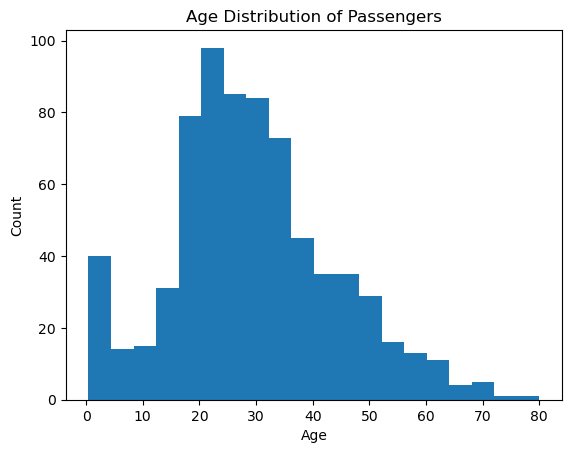

In [16]:
#Age Distribution 
plt.hist(df["Age"].dropna(), bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers")
plt.show()


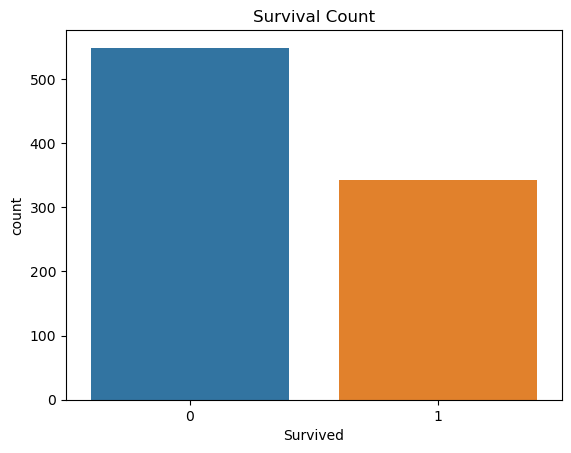

In [17]:
#Survival Count
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()


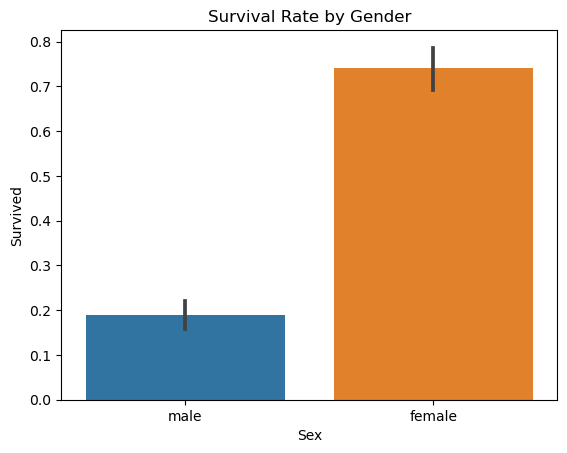

In [18]:
#Survival vs Gender
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()


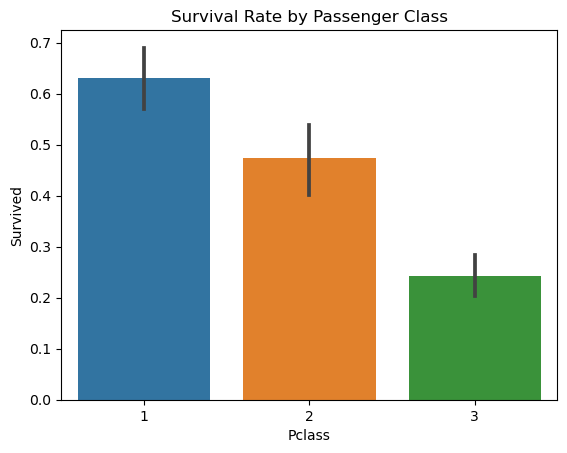

In [19]:
#Survival vs Passenger Class
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()


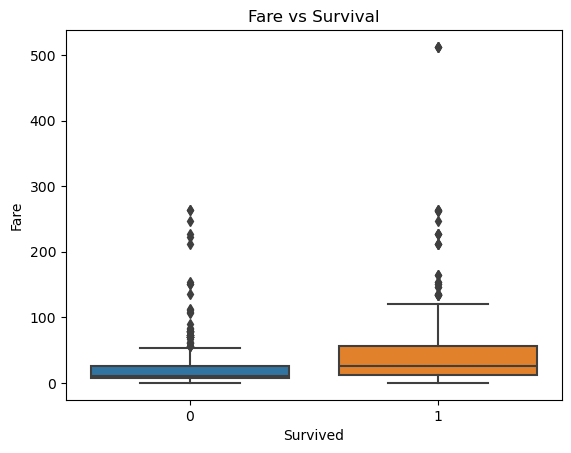

In [20]:
#Fare vs Survival
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare vs Survival")
plt.show()


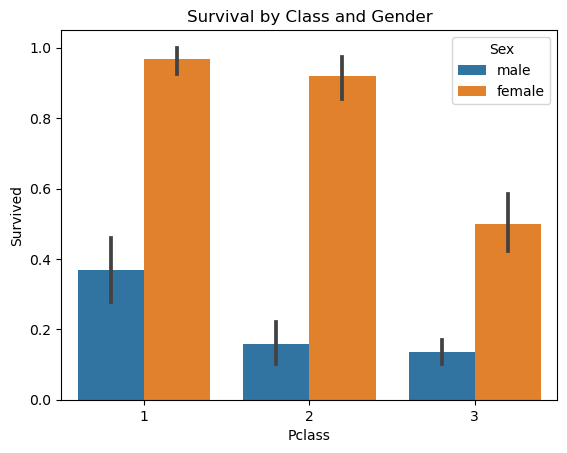

In [21]:
#Gender + Class vs Survival
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df)
plt.title("Survival by Class and Gender")
plt.show()


In [ ]:
"""Gender strongly influenced survival chances.

Passenger class played a major role in survival.

Higher fares were associated with higher survival probability.

Most passengers were young adults.

Survival patterns suggest social and economic factors mattered."""